[INFO] Loaded 21 descriptor(s) from ./mapping_schemes
Selected mapping: mapping_scheme_323
Score: 2


C:\Users\MaxHaberbusch\AppData\Local\Temp\ipykernel_25548\1186138974.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


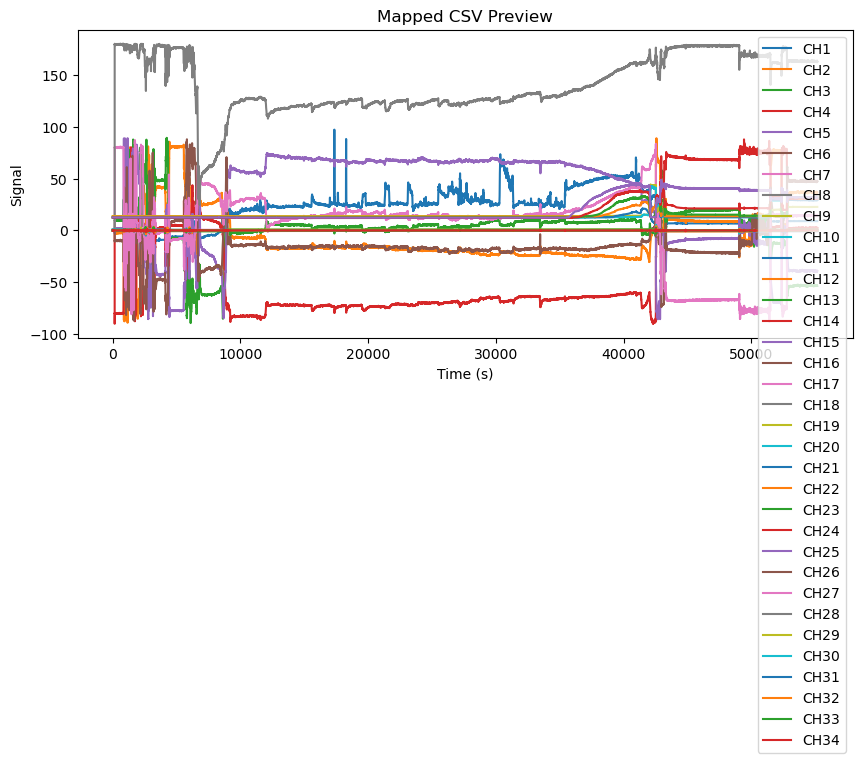

✅ Saved standardized data to: output\FI_SNS_001_KRL_PostSNS_MadgTest_v42.npz


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 3

import matplotlib.pyplot as plt
from pathlib import Path
from sparcfuse.utils import match_best_mapping, load_all_descriptors, save_standardized_output

# Load all descriptor files from folder
descriptors = load_all_descriptors()

# File to convert
filepath = "../downloads/FI_SNS_001_KRL_PostSNS_MadgTest_v42.csv"
filename = Path(filepath).name

# Optional: specify SPARC ID for faster mapping
# Works also without sparc_id as the mapping scheme from other csvs works well on this acq file as well
result = match_best_mapping(descriptors, filepath, sparc_id=323)

# Check if mapping was successful
if result["descriptor"] is None:
    raise RuntimeError("No suitable mapping descriptor found.")

# Show mapping result
print("Selected mapping:", result['descriptor']['id'])
print("Score:", result['score'])

# Preview signal
time = result['result']['time']
signals = result['result']['signals']

# Plot
plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    plt.plot(time, ch, label=f"CH{i+1}")
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Mapped CSV Preview")
plt.legend()
plt.tight_layout()
plt.show()


# Save to standardized .npz format in ./output
output_dir = Path("../output")
output_dir.mkdir(parents=True, exist_ok=True)

output_path = output_dir / filename.replace(".csv", ".npz")

save_standardized_output(
    output_path=output_path,
    result_dict=result["result"],
    descriptor=result["descriptor"],
    original_filename=filename,
    annotations=result["result"].get("annotations", []),
    metadata_overrides=None,
    file_format="npz"
)

print(f"✅ Saved standardized data to: {output_path}")


C:\Users\MaxHaberbusch\AppData\Local\Temp\ipykernel_25548\88094863.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


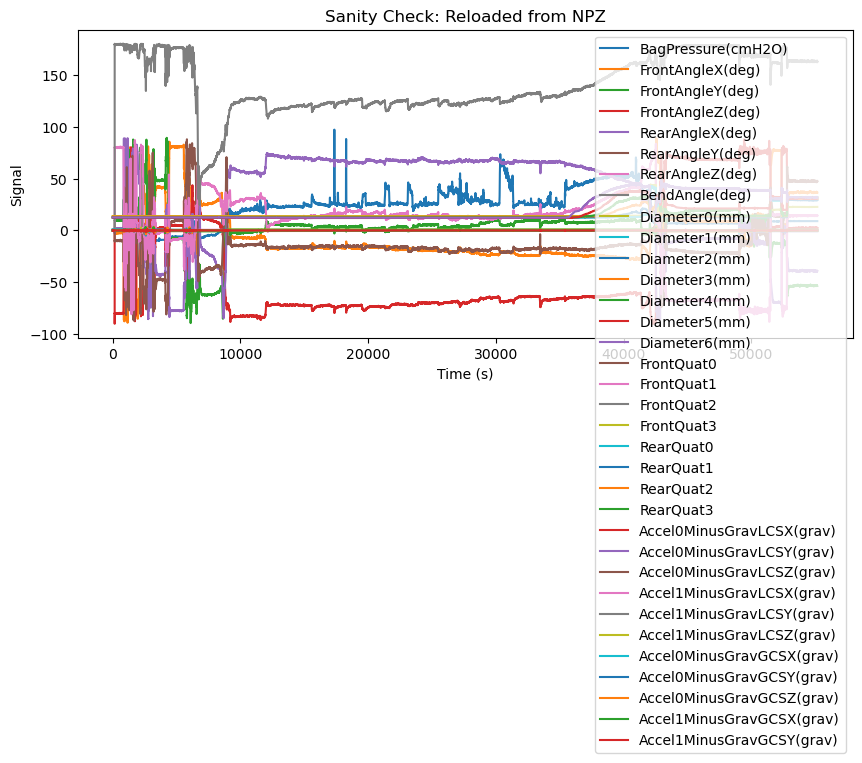

{'time_units': 'seconds', 'time_auto_generated': False, 'source_format': '.csv', 'database_id': 'unknown', 'sampling_frequency': None, 'channel_names': ['BagPressure(cmH2O)', 'FrontAngleX(deg)', 'FrontAngleY(deg)', 'FrontAngleZ(deg)', 'RearAngleX(deg)', 'RearAngleY(deg)', 'RearAngleZ(deg)', 'BendAngle(deg)', 'Diameter0(mm)', 'Diameter1(mm)', 'Diameter2(mm)', 'Diameter3(mm)', 'Diameter4(mm)', 'Diameter5(mm)', 'Diameter6(mm)', 'FrontQuat0', 'FrontQuat1', 'FrontQuat2', 'FrontQuat3', 'RearQuat0', 'RearQuat1', 'RearQuat2', 'RearQuat3', 'Accel0MinusGravLCSX(grav)', 'Accel0MinusGravLCSY(grav)', 'Accel0MinusGravLCSZ(grav)', 'Accel1MinusGravLCSX(grav)', 'Accel1MinusGravLCSY(grav)', 'Accel1MinusGravLCSZ(grav)', 'Accel0MinusGravGCSX(grav)', 'Accel0MinusGravGCSY(grav)', 'Accel0MinusGravGCSZ(grav)', 'Accel1MinusGravGCSX(grav)', 'Accel1MinusGravGCSY(grav)'], 'channel_units': ['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unk

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load the .npz file
npz_path = Path("../output/FI_SNS_001_KRL_PostSNS_MadgTest_v42.npz")
data = np.load(npz_path, allow_pickle=True)

# Extract arrays
time = data["time"]
signals = data["signals"]
metadata = data["metadata"].item()  # metadata is saved as a Python dict
channel_names = metadata.get("channel_names", [f"CH{i+1}" for i in range(len(signals))])

# Plot
plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    plt.plot(time, ch, label=channel_names[i])
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Sanity Check: Reloaded from NPZ")
plt.legend()
plt.tight_layout()
plt.show()

print(data['metadata'])